Missing or duplicate data may exist in a data set for a number of different reasons. Sometimes, missing or duplicate data is introduced as we perform cleaning and transformation tasks such as:

* Combining data
* Reindexing data
* Reshaping data

Other times, it exists in the original data set for reasons such as:

* User input error
* Data storage or conversion issues

In the case of missing values, they may also exist in the original data set to purposely indicate that data is unavailable.

In the Pandas Fundamentals course, we learned that there are various ways to handle missing data:

* Remove any rows that have missing values
* Remove any columns that have missing values
* Fill the missing values with some other value
* Leave the missing values as is

In [1]:
import pandas as pd 

In [2]:
happiness2015 = pd.read_csv('data/wh_2015.csv')
happiness2016 = pd.read_csv('data/wh_2016.csv')
happiness2017 = pd.read_csv('data/wh_2017.csv')

In [3]:
happiness2015.shape

(164, 13)

In [4]:
happiness2016.shape

(164, 14)

In [5]:
happiness2017.shape

(164, 13)

In [6]:
missing2015 = happiness2015.isnull().sum()

In [7]:
missing2015

Country                          0
Region                           6
Happiness Rank                   6
Happiness Score                  6
Standard Error                   6
Economy (GDP per Capita)         6
Family                           6
Health (Life Expectancy)         6
Freedom                          6
Trust (Government Corruption)    6
Generosity                       6
Dystopia Residual                6
Year                             0
dtype: int64

In [8]:
missing2016 = happiness2016.isnull().sum()
missing2016 

Country                          0
Region                           7
Happiness Rank                   7
Happiness Score                  7
Lower Confidence Interval        7
Upper Confidence Interval        7
Economy (GDP per Capita)         7
Family                           7
Health (Life Expectancy)         7
Freedom                          7
Trust (Government Corruption)    7
Generosity                       7
Dystopia Residual                7
Year                             0
dtype: int64

In [9]:
missing2017 = happiness2017.isnull().sum()
missing2017 

Country                          0
Happiness.Rank                   9
Happiness.Score                  9
Whisker.high                     9
Whisker.low                      9
Economy..GDP.per.Capita.         9
Family                           9
Health..Life.Expectancy.         9
Freedom                          9
Generosity                       9
Trust..Government.Corruption.    9
Dystopia.Residual                9
Year                             0
dtype: int64

It's good to check for missing values before transforming data to make sure we don't unintentionally introduce missing values.

If we do introduce missing values after transforming data, we'll have to determine if the data is really missing or if it's the result of some kind of error. As we progress through this lesson, we'll use the following workflow to clean our missing values, starting with checking for errors:

1. Check for errors in data cleaning/transformation.
2. Use data from additional sources to fill missing values.
3. Drop row/column.
4. Fill missing values with reasonable estimates computed from the available data.

In [10]:
combined = pd.concat([happiness2015,happiness2016,happiness2017], ignore_index=True)
combined.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Lower Confidence Interval,Upper Confidence Interval,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Health..Life.Expectancy.,Trust..Government.Corruption.,Dystopia.Residual
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
combined.isnull().sum()

Country                            0
Region                           177
Happiness Rank                   177
Happiness Score                  177
Standard Error                   334
Economy (GDP per Capita)         177
Family                            22
Health (Life Expectancy)         177
Freedom                           22
Trust (Government Corruption)    177
Generosity                        22
Dystopia Residual                177
Year                               0
Lower Confidence Interval        335
Upper Confidence Interval        335
Happiness.Rank                   337
Happiness.Score                  337
Whisker.high                     337
Whisker.low                      337
Economy..GDP.per.Capita.         337
Health..Life.Expectancy.         337
Trust..Government.Corruption.    337
Dystopia.Residual                337
dtype: int64

We can see above that our dataframe has many missing values and these missing values follow a pattern. Most columns fall into one of the following categories:

* 177 missing values (about 1/3 of the total values)
* 337 missing values (about 2/3 of the total values)

You may have also noticed that some of the column names differ only by punctuation, which caused the dataframes to be combined incorrectly:

Trust (Government Corruption)<br/>
Trust..Government.Corruption.

We'll update the column names to make them uniform and combine the dataframes again.


In [12]:
happiness2017.columns = happiness2017.columns.str.replace('.', ' ').str.replace('\s+', ' ').str.strip().str.upper()
happiness2015.columns = happiness2015.columns.str.replace('(', '').str.replace(')', '').str.strip().str.upper()
happiness2016.columns = happiness2016.columns.str.replace('(', '').str.replace(')', '').str.strip().str.upper()

In [13]:
combined = pd.concat([happiness2015, happiness2016, happiness2017], ignore_index=True)
missing = combined.isnull().sum()

In [14]:
missing

COUNTRY                          0
REGION                         177
HAPPINESS RANK                  22
HAPPINESS SCORE                 22
STANDARD ERROR                 334
ECONOMY GDP PER CAPITA          22
FAMILY                          22
HEALTH LIFE EXPECTANCY          22
FREEDOM                         22
TRUST GOVERNMENT CORRUPTION     22
GENEROSITY                      22
DYSTOPIA RESIDUAL               22
YEAR                             0
LOWER CONFIDENCE INTERVAL      335
UPPER CONFIDENCE INTERVAL      335
WHISKER HIGH                   337
WHISKER LOW                    337
dtype: int64

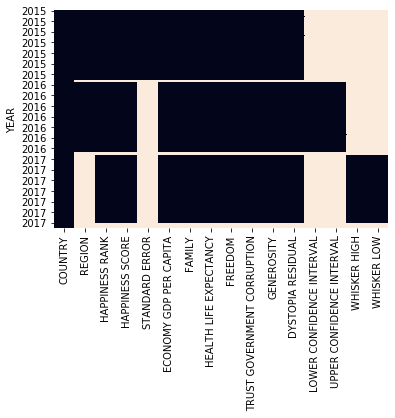

In [15]:
import seaborn as sns
combined_updated = combined.set_index('YEAR')
sns.heatmap(combined_updated.isnull(), cbar=False)